#  ECON 441B Homework1
## Xun GONG 205452646

In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [9]:
data.dropna(inplace = True)

In [10]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [11]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [12]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [13]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [17]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [15]:
import matplotlib.pyplot as plt

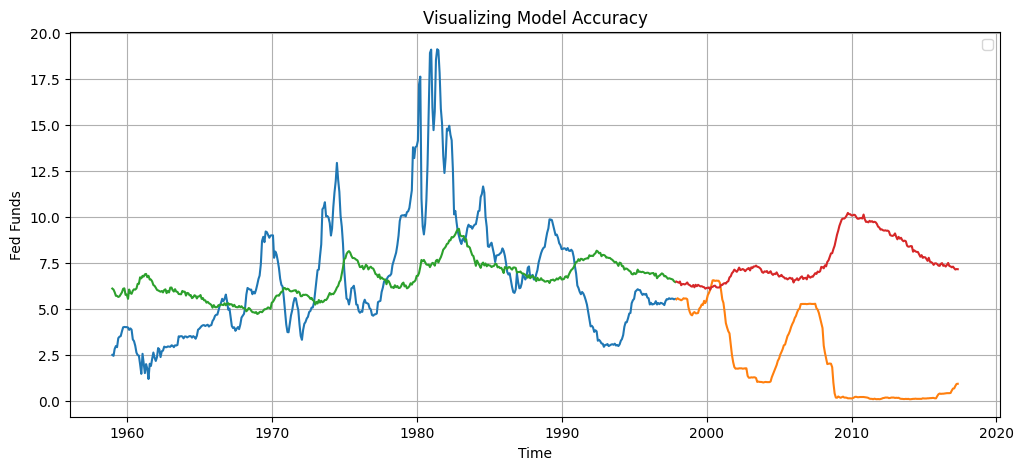

In [24]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)

plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [27]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.07142201316864
Outsample MSE :  40.3608278356673


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [28]:
from sklearn.preprocessing import PolynomialFeatures

Degree: 1


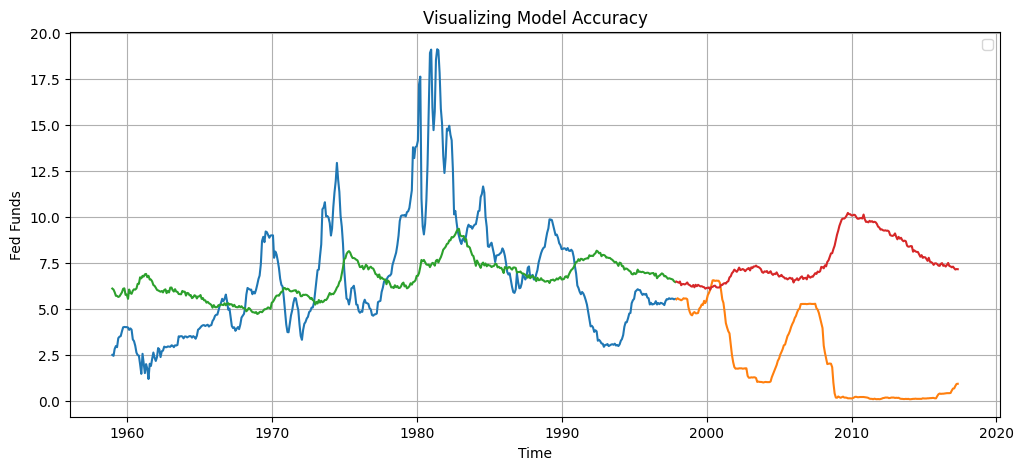

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566597
Degree: 2


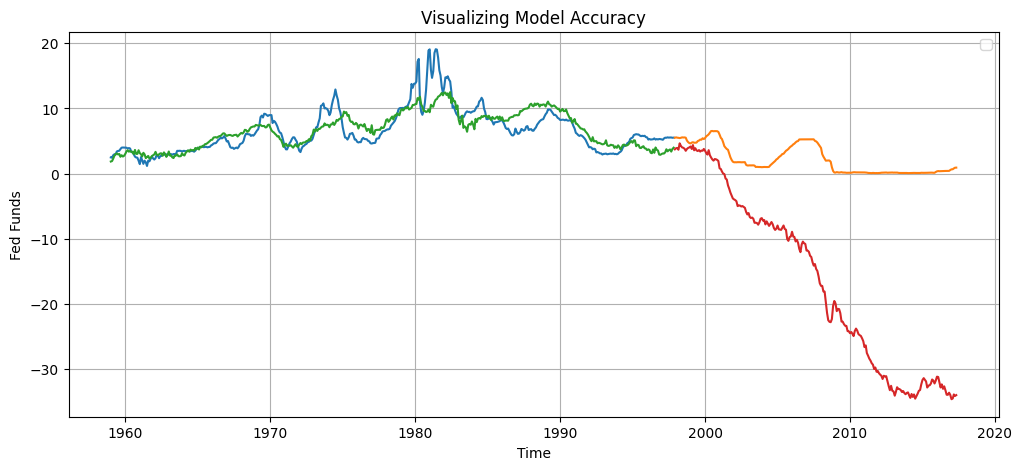

Insample MSE :  3.863477139276067
Outsample MSE :  481.44650991903114
Degree: 3


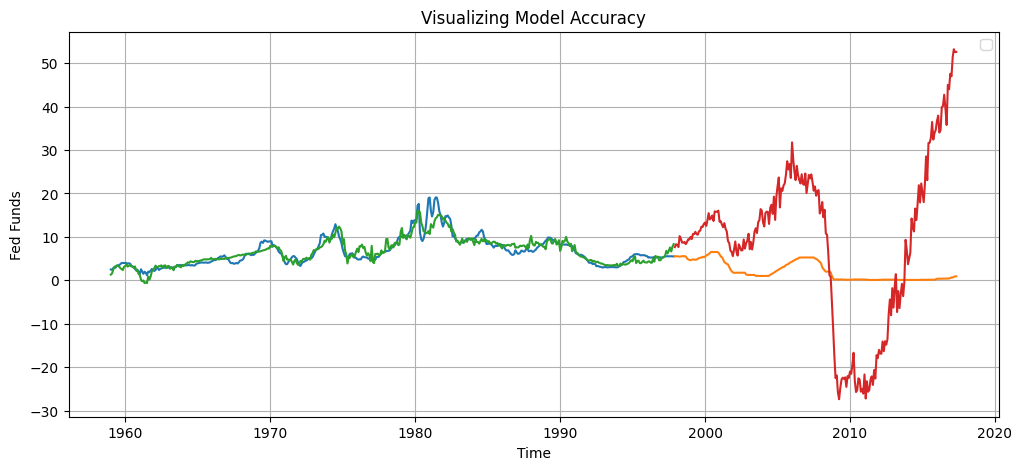

Insample MSE :  1.8723636267615362
Outsample MSE :  371.7677847482646


In [43]:
max_degrees = 3

for degrees in  range(1,max_degrees+1):
    print('Degree:', degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    pred_in = model1.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)
    pred_out = model1.predict(X_out_poly)
    pred_out = pd.DataFrame(pred_out, index = y_out.index)
    
    
    plt.figure(figsize = (12,5))
    ###
    plt.plot(y_in)
    plt.plot(y_out)

    plt.plot(pred_in)
    plt.plot(pred_out)
    ###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(model1.predict(X_in_poly), y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly), y_out)
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)

# 7.) State your observations :

Type Markdown and LaTeX:  𝛼2 

As we including polynomial terms in this models, the model seems to fit the training data better.
The insample MSE is decreasing when we increase the complexity of our model. And from the plot, we can see predicted value of the polynomial models is much more closed to the true value term (expecially degree 3 model).

However, we can also observe a tradeoff between variance and bias. As we including polynomial terms and fit the training better, we also found that the prediction for out sample data is much more far away from the true data. The outsample MSEs of polynomial models are much larger than in the simplest model, which indicated a decrease in prediction accuracy.